# PCA(주성분 분석)
---
- 전체 특성(Feature)에서 주요 특성(Feature) 압축/융합하는 비지도 학습
- fit() + transform() 2단계 거쳐 주성분 분석

In [1]:
# 모듈 로딩
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## [1] 데이터 준비
---

In [2]:
# 데이터 로딩
FILE = './data/default of credit card clients.xls'

df = pd.read_excel(FILE, header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df = df.drop('ID', axis=1)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
# 데이터와 타겟 분리
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

In [6]:
# scatter_matrix(data, figsize=(12,10))
# plt.tight_layout()
# plt.show()

## 데이터 전처리

In [7]:
# 컬럼 unique 확인
for col in df.columns:
    print(f'{col} 컬럼값\n{df[col].unique()}\n')

LIMIT_BAL 컬럼값
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]

SEX 컬럼값
[2 1]

EDUCATION 컬럼값
[2 1 3 5 4 6 0]

MARRIAGE 컬럼값
[1 2 3 0]

AGE 컬럼값
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]

PAY_0 컬럼값
[ 2 -1  0 -2  1  3  4  8  7  5  6]

PAY_2 컬럼값
[ 2  0 -1 -2  3  5  

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()
scaler.fit(data)
data_scaled=scaler.transform(data)

In [10]:
data_scaled

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

## PCA 주성분 분석 
---
- data의 23개 Feature 중에서 데이터 추출

In [11]:
pca=PCA()

In [12]:
# 지정된 데이터에서 주성분 추출
pca.fit(data_scaled)

PCA()

In [13]:
# 주성분 행렬
pca.singular_values_

array([443.04929774, 350.6420357 , 215.70539822, 210.16175361,
       175.37713289, 169.45792011, 165.00799458, 163.18238146,
       161.67090383, 153.25759279, 148.26882983, 143.12454352,
       130.87573497, 125.42606134, 110.04188243,  88.29841154,
        86.45145711,  75.23782289,  62.87756995,  45.87669015,
        34.97910792,  27.54735755,  26.39274393])

In [14]:
# 주성분에서 투영 후 분산 정도 설명
pca.explained_variance_

array([6.54330745, 4.09846452, 1.55101233, 1.4723145 , 1.02527213,
       0.95723146, 0.9076182 , 0.88764591, 0.87127841, 0.78295576,
       0.73281262, 0.68284393, 0.57096763, 0.52440738, 0.40365398,
       0.25989565, 0.24913679, 0.18869729, 0.13179069, 0.07015803,
       0.04078596, 0.02529607, 0.02322001])

In [15]:
# 주성분에 투영 후 분산 정도 설명
pca.explained_variance_ratio_

array([0.28448215, 0.17818817, 0.06743307, 0.06401154, 0.04457556,
       0.04161737, 0.03946035, 0.03859201, 0.03788041, 0.03404042,
       0.03186036, 0.02968788, 0.02482385, 0.02279956, 0.01754959,
       0.01129943, 0.01083167, 0.00820396, 0.00572984, 0.00305025,
       0.00177324, 0.00109979, 0.00100953])

## 주성분 개수 지정
---
- 방법1) explained_variance_ratio_의 누적값에서 원하는 분포정도 지정해서 PC개수 계산
- 방법2) n_componets = 0.0`1.0 : 주성분 투영된 데이터 분포정도 지정하면 PC개수 자동 계산

### 방법[1]

In [16]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

print(f'주성분 개수(차원) : {d}')

주성분 개수(차원) : 15


In [17]:
## 지정된 PC 개수로 주성분 데이터 압축/융합
pca=PCA(n_components=d)

In [18]:
pca.fit(data_scaled)

PCA(n_components=15)

In [19]:
cardPCA=pca.transform(data_scaled)

In [20]:
cardPCA.shape

(30000, 15)

In [21]:
cardPCA[:5]

array([[-1.88796243, -0.90610864, -0.48779485, -0.54001512,  0.99795729,
         0.0444039 , -0.6236867 ,  0.11279385, -0.18989407, -0.08460241,
         0.24536379,  3.26440454, -1.04859065, -0.31852526, -0.19742516],
       [-0.76469577, -2.10928757,  1.0973135 , -0.48347978,  0.85898024,
        -0.23509848,  0.06474193,  0.09359506, -0.15369954,  0.12403462,
         0.14171121, -0.88185464,  0.07816213, -0.27330449,  0.43800749],
       [-0.8474079 , -1.07217896,  0.4121783 , -0.4335639 ,  0.77049273,
         0.01866504, -0.15047242, -0.09188369, -0.15617916,  0.08917074,
         0.04622218, -0.27301229,  0.51995332,  0.33860313,  0.01437861],
       [-0.1965886 , -0.80902155, -0.81864236,  0.29287825,  0.90936607,
        -0.28464494,  0.23522086, -0.06298424,  0.11461239, -0.06700726,
         0.02131769,  0.03954459, -0.71191663,  0.50435361,  0.05611552],
       [-0.84093409, -0.07253802, -1.00525746,  2.3280133 , -1.02312379,
         0.79433025,  0.71106909,  0.12419084, 

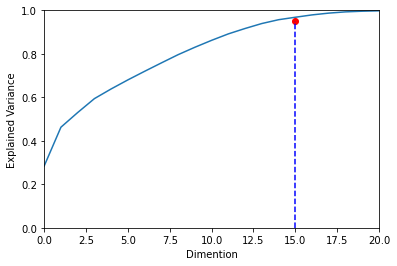

In [22]:
## 주성분과 데이터 투영 분산 정도 시각화
plt.plot(cumsum)
plt.plot(d, 0.95, 'ro')
plt.plot([15.0, 15.0], [0, 0.95], 'b--')
plt.axis([0, 20, 0, 1])
plt.xlabel('Dimention')
plt.ylabel('Explained Variance')
plt.show()

### 방법[2]

In [23]:
pca3=PCA(n_components=0.95)

In [24]:
pca3.fit(data_scaled)

PCA(n_components=0.95)

In [25]:
pca3.explained_variance_, pca3.explained_variance_ratio_

(array([6.54330745, 4.09846452, 1.55101233, 1.4723145 , 1.02527213,
        0.95723146, 0.9076182 , 0.88764591, 0.87127841, 0.78295576,
        0.73281262, 0.68284393, 0.57096763, 0.52440738, 0.40365398]),
 array([0.28448215, 0.17818817, 0.06743307, 0.06401154, 0.04457556,
        0.04161737, 0.03946035, 0.03859201, 0.03788041, 0.03404042,
        0.03186036, 0.02968788, 0.02482385, 0.02279956, 0.01754959]))

In [26]:
cardPCA3=pca3.transform(data_scaled)
cardPCA3.shape

(30000, 15)

In [27]:
cardPCADF=pd.DataFrame(cardPCA3)
cardPCADF.columns = ['pca_'+str(i) for i in range(1,16)]
cardPCADF.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15
0,-1.887962,-0.906109,-0.487795,-0.540015,0.997957,0.044404,-0.623687,0.112794,-0.189894,-0.084602,0.245364,3.264405,-1.048591,-0.318525,-0.197425
1,-0.764696,-2.109288,1.097314,-0.483480,0.858980,-0.235098,0.064742,0.093595,-0.153700,0.124035,0.141711,-0.881855,0.078162,-0.273304,0.438007
2,-0.847408,-1.072179,0.412178,-0.433564,0.770493,0.018665,-0.150472,-0.091884,-0.156179,0.089171,0.046222,-0.273012,0.519953,0.338603,0.014379
3,-0.196589,-0.809022,-0.818642,0.292878,0.909366,-0.284645,0.235221,-0.062984,0.114612,-0.067007,0.021318,0.039545,-0.711917,0.504354,0.056116
4,-0.840934,-0.072538,-1.005257,2.328013,-1.023124,0.794330,0.711069,0.124191,0.602528,-0.307478,1.035848,-0.608437,0.072147,1.327269,0.214260


In [28]:
cardPCADF=pd.concat([cardPCADF, target], axis=1)
cardPCADF.rename(columns = {'default payment next month':'target'}, inplace=True)

In [29]:
cardPCADF.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,target
0,-1.887962,-0.906109,-0.487795,-0.540015,0.997957,0.044404,-0.623687,0.112794,-0.189894,-0.084602,0.245364,3.264405,-1.048591,-0.318525,-0.197425,1
1,-0.764696,-2.109288,1.097314,-0.483480,0.858980,-0.235098,0.064742,0.093595,-0.153700,0.124035,0.141711,-0.881855,0.078162,-0.273304,0.438007,1
2,-0.847408,-1.072179,0.412178,-0.433564,0.770493,0.018665,-0.150472,-0.091884,-0.156179,0.089171,0.046222,-0.273012,0.519953,0.338603,0.014379,0
3,-0.196589,-0.809022,-0.818642,0.292878,0.909366,-0.284645,0.235221,-0.062984,0.114612,-0.067007,0.021318,0.039545,-0.711917,0.504354,0.056116,0
4,-0.840934,-0.072538,-1.005257,2.328013,-1.023124,0.794330,0.711069,0.124191,0.602528,-0.307478,1.035848,-0.608437,0.072147,1.327269,0.214260,0


In [30]:
# 타겟별 시각화
target_0=cardPCADF[cardPCADF.target == 0]
target_1=cardPCADF[cardPCADF.target == 1]

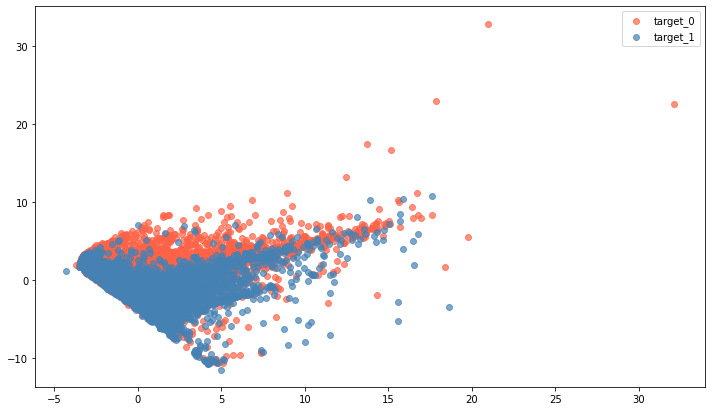

In [31]:
plt.figure(figsize=(12,7))
plt.scatter(target_0['pca_1'], target_0['pca_2'], c='tomato', alpha=0.7)
plt.scatter(target_1['pca_1'], target_1['pca_2'], c='steelblue', alpha=0.7)
plt.legend(['target_0', 'target_1'])
plt.show()

# Scikeras
---
- Keras/Tensorflow에서 Scikit-learn을 사용하기 위한 인터페이스
- Scikit-learn의 Pipelin, Hyperparameter 튜닝 기능 사용에 좋음
- 설치
    * !pip imstall scikeras

In [32]:
# 모듈 로딩
from scikeras.wrappers import KerasRegressor, KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.backend import clear_session
import numpy as np

In [33]:
## 동일 결과 출력 시드 설정

In [34]:
clear_session()
np.random.seed(42)
set_random_seed(42)

## [1] 데이터 로딩 및 준비

In [35]:
x_data = cardPCADF.iloc[:, :-1]
y = cardPCADF['target']

In [36]:
x_data = x_data.to_numpy()
y = y.to_numpy()

In [37]:
# 원핫인코딩
from sklearn.preprocessing import OneHotEncoder
ohencoder=OneHotEncoder()
ohencoder.fit(y.reshape(-1,1))
y=ohencoder.transform(y.reshape(-1,1))

In [38]:
y=y.toarray()

In [39]:
x_data.shape, y.shape

((30000, 15), (30000, 2))

## [2] 모델 생성

In [40]:
# 파라미터 => KerasClassifier 또는 KerasRegressor의 parameter로 추가됨
def build_model(n_hidden, n_neurons, learning_rate, input_shape=(15,)):
    
    model = Sequential()
    
    model.add(InputLayer(input_shape=input_shape))
    
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation='relu'))
        
    model.add(Dense(2, activation='sigmoid'))
    
    return model

In [41]:
keras_clf = KerasClassifier(build_model,
                             n_hidden=10,
                             n_neurons=30,
                             learning_rate=0.001,
                             loss='binary_crossentropy',
                             epochs=5)

In [42]:
keras_clf.fit(x_data, y)

Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 0.4659
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4445
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4401
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4378
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4356


KerasClassifier(
	model=<function build_model at 0x0000022025DF0D30>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=binary_crossentropy
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=5
	n_hidden=10
	n_neurons=30
	learning_rate=0.001
	class_weight=None
)

In [43]:
mse_test = keras_clf.score(x_data, y)

938/938 [==============================] - 1s 1ms/step


In [44]:
print(f'mse_test : {mse_test}')

mse_test : 0.8171666666666667


In [45]:
keras_clf.get_params

<bound method BaseEstimator.get_params of KerasClassifier(
	model=<function build_model at 0x0000022025DF0D30>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=binary_crossentropy
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=5
	n_hidden=10
	n_neurons=30
	learning_rate=0.001
	class_weight=None
)>

## [3] Hyperparameter Tunning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
params = {
    'h_hidden': [1,3,5,10],
    'n_nerouns': [10,30,50,70],
    'optimizer': ['adam', 'sgd'],
    'learning_rate': [0.0001,0.001,0.01,0.1]
}

gs = GridSearchCV(keras_clf, params,
                 refit=False, cv=3,
                 scoring='accuracy',
                 verbose=0)

In [48]:
print('fitting...')
gs.fit(x_data, y)
print('END')

fitting...


ValueError: Invalid parameter h_hidden for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(h_hidden=1)`
Check the list of available parameters with `estimator.get_params().keys()`

In [ ]:
print(gs.best_score_, gs.best_params_, sep='\n')